In [1]:
import torch
import torchvision
import torch.nn as nn
import torchvision.transforms as transforms
import pandas as pd
import numpy as np
import torch.nn.functional as F
import torch.optim as optim

import matplotlib.pyplot as plt
import seaborn as sns
from torch.utils.data import ConcatDataset

from data_functions import *
from metric_functions import *
from helper_functions import *
from models import *

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [2]:
dataset = load_data("./train")
labels = dataset.classes
train, val = trai_val_split(dataset, 0.8)

In [3]:
train_loader = torch.utils.data.DataLoader(train, batch_size=64, shuffle=True)
val_loader = torch.utils.data.DataLoader(val, batch_size=64, shuffle=True)

In [4]:
def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

## Augumentacja danych

In [5]:
iters = [i for i in range(1, 11)]

### Odwracanie obrazków

In [6]:
transform_flip = transforms.Compose(
    [transforms.RandomHorizontalFlip(0.5),
     transforms.RandomVerticalFlip(0.5),
     transforms.RandomRotation(24),
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

dataset_flip = load_data("./train", transform=transform_flip)
merged = ConcatDataset([dataset, dataset_flip])
train_flip, val_flip = trai_val_split(merged, 0.8)

In [7]:
net_flip = CustomNet(num_classes=len(labels)).to(device)

train_loader = torch.utils.data.DataLoader(train_flip, batch_size=32, shuffle=True, num_workers=8)
val_loader = torch.utils.data.DataLoader(val_flip, batch_size=32, shuffle=True, num_workers=8)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net_flip.parameters(), lr=0.001)

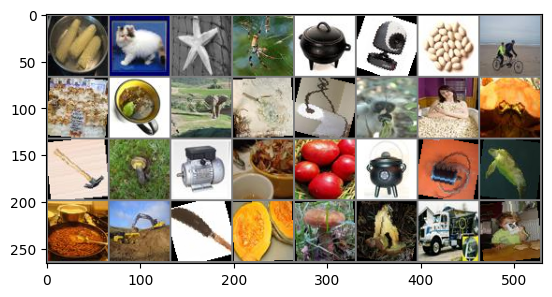

In [8]:
train_batch, train_labels = next(iter(train_loader))
val_batch, val_labels = next(iter(val_loader))

imshow(torchvision.utils.make_grid(train_batch))

In [9]:
loss_hist, train_eval_hist, val_eval_hist = train_model(net_flip, train_loader, val_loader, criterion, optimizer, get_accuracy, device, 10)

100%|██████████| 10/10 [12:21<00:00, 74.13s/it]


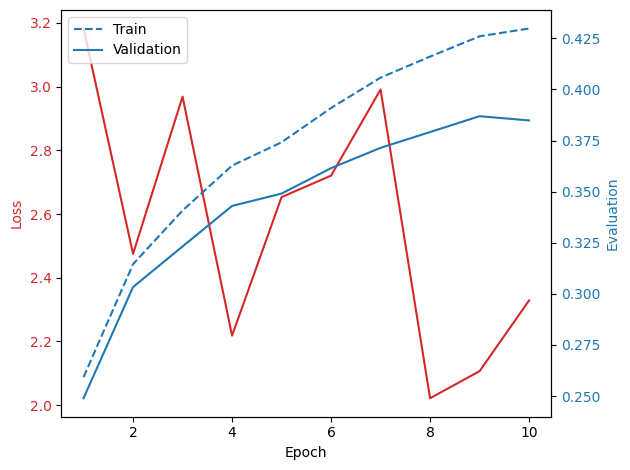

In [10]:
plot_training(iters, loss_hist, train_eval_hist, val_eval_hist)

### Przekształcanie kolorów

In [11]:
transform_color = transforms.Compose(
    [transforms.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5, hue=0.5),
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

dataset_color = load_data("./train", transform=transform_color)
merged = ConcatDataset([dataset, dataset_color])
train_color, val_color = trai_val_split(merged, 0.8)

In [12]:
net_color = CustomNet(num_classes=len(labels)).to(device)

train_loader = torch.utils.data.DataLoader(train_color, batch_size=32, shuffle=True, num_workers=8)
val_loader = torch.utils.data.DataLoader(val_color, batch_size=32, shuffle=True, num_workers=8)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net_color.parameters(), lr=0.001)

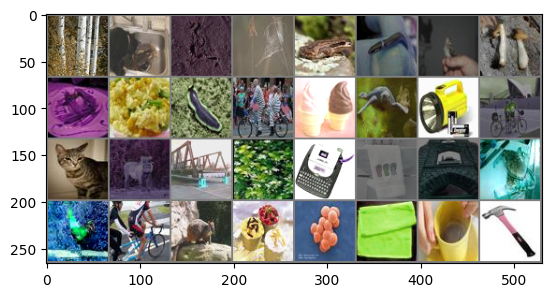

In [13]:
train_batch, train_labels = next(iter(train_loader))
val_batch, val_labels = next(iter(val_loader))

imshow(torchvision.utils.make_grid(train_batch))

In [14]:
loss_hist, train_eval_hist, val_eval_hist = train_model(net_color, train_loader, val_loader, criterion, optimizer, get_accuracy, device, 10)

100%|██████████| 10/10 [15:12<00:00, 91.29s/it]


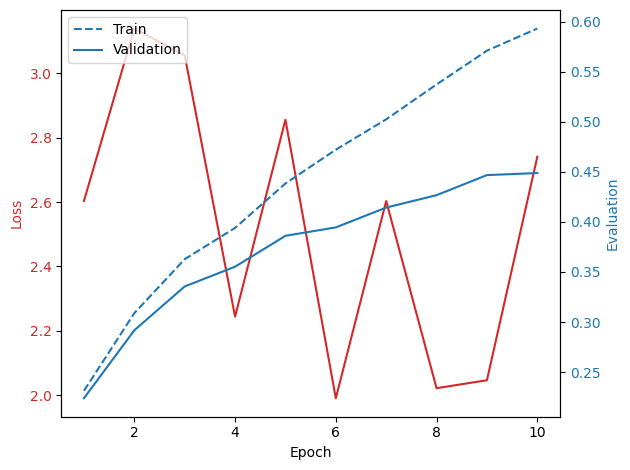

In [15]:
plot_training(iters, loss_hist, train_eval_hist, val_eval_hist)

### Przycinanie obrazków

In [51]:
transform_crop = transforms.Compose(
    [transforms.RandomResizedCrop(64),
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

dataset_crop = load_data("./train", transform=transform_crop)
merged = ConcatDataset([dataset, dataset_crop])
train_crop, val_crop = trai_val_split(merged, 0.8)

In [52]:
net_crop = CustomNet(num_classes=len(labels)).to(device)

train_loader = torch.utils.data.DataLoader(train_crop, batch_size=32, shuffle=True, num_workers=8)
val_loader = torch.utils.data.DataLoader(val_crop, batch_size=32, shuffle=True, num_workers=8)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net_crop.parameters(), lr=0.001)

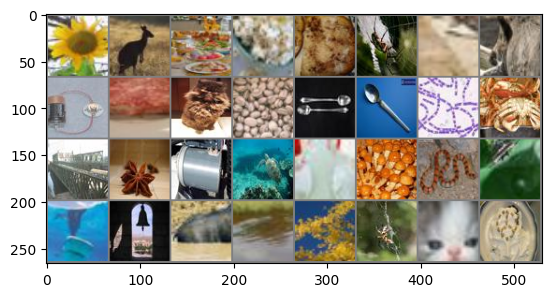

In [53]:
train_batch, train_labels = next(iter(train_loader))

imshow(torchvision.utils.make_grid(train_batch))

In [54]:
loss_hist, train_eval_hist, val_eval_hist = train_model(net_crop, train_loader, val_loader, criterion, optimizer, get_accuracy, device, 10)

100%|██████████| 10/10 [09:00<00:00, 54.07s/it]


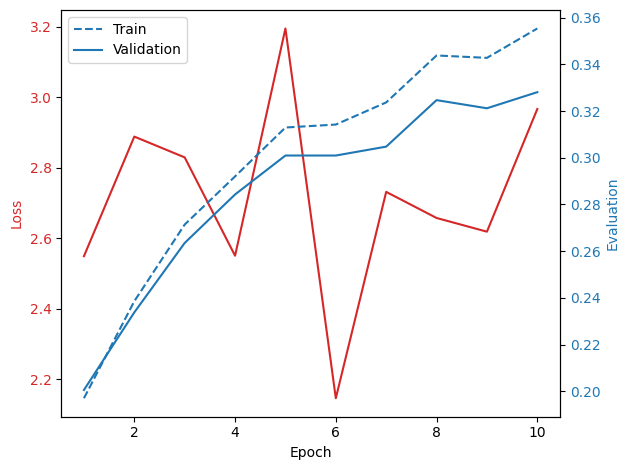

In [55]:
plot_training(iters, loss_hist, train_eval_hist, val_eval_hist)

### Wymazywanie obrazków

In [22]:
transform_erase = transforms.Compose(
    [transforms.ToTensor(),
     transforms.RandomErasing(0.5),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

dataset_erase = load_data("./train", transform=transform_erase)
merged = ConcatDataset([dataset, dataset_erase])
train_erase, val_erase = trai_val_split(merged, 0.8)

In [23]:
net_erase = CustomNet(num_classes=len(labels)).to(device)

train_loader = torch.utils.data.DataLoader(train_erase, batch_size=32, shuffle=True, num_workers=8)
val_loader = torch.utils.data.DataLoader(val_erase, batch_size=32, shuffle=True, num_workers=8)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net_erase.parameters(), lr=0.001)

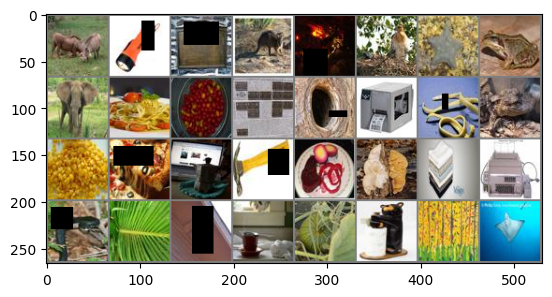

In [24]:
train_batch, train_labels = next(iter(train_loader))
val_batch, val_labels = next(iter(val_loader))

imshow(torchvision.utils.make_grid(train_batch))

In [25]:
loss_hist, train_eval_hist, val_eval_hist = train_model(net_erase, train_loader, val_loader, criterion, optimizer, get_accuracy, device, 10)

100%|██████████| 10/10 [09:50<00:00, 59.01s/it]


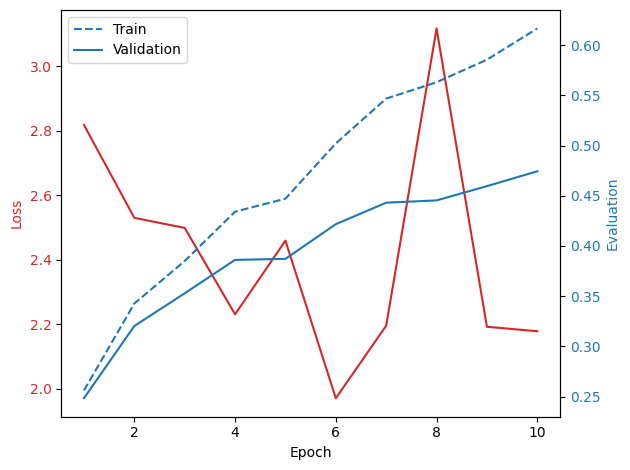

In [26]:
plot_training(iters, loss_hist, train_eval_hist, val_eval_hist)

### Blur 

In [27]:
transform_blur = transforms.Compose(
    [transforms.GaussianBlur(3),
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

dataset_blur = load_data("./train", transform=transform_blur)
merged = ConcatDataset([dataset, dataset_blur])
train_blur, val_blur = trai_val_split(merged, 0.8)

In [28]:
net_blur = CustomNet(num_classes=len(labels)).to(device) 

train_loader = torch.utils.data.DataLoader(train_blur, batch_size=32, shuffle=True, num_workers=8)
val_loader = torch.utils.data.DataLoader(val_blur, batch_size=32, shuffle=True, num_workers=8)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net_blur.parameters(), lr=0.001)

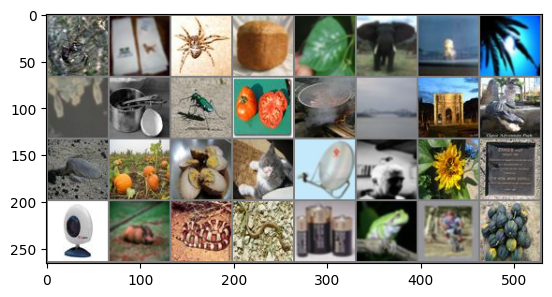

In [29]:
train_batch, train_labels = next(iter(train_loader))
val_batch, val_labels = next(iter(val_loader))

imshow(torchvision.utils.make_grid(train_batch))

In [30]:
loss_hist, train_eval_hist, val_eval_hist = train_model(net_blur, train_loader, val_loader, criterion, optimizer, get_accuracy, device, 10)

100%|██████████| 10/10 [09:23<00:00, 56.38s/it]


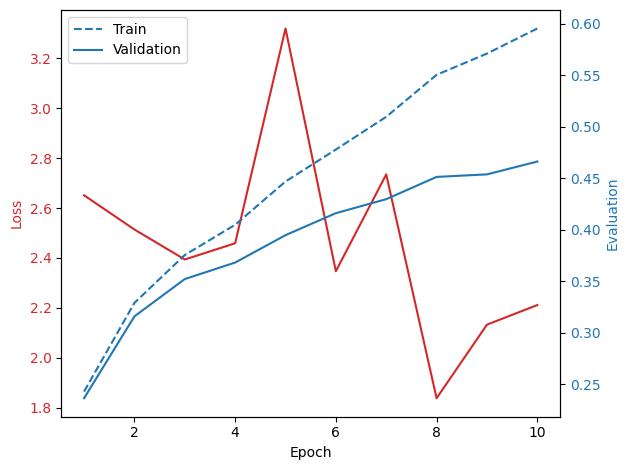

In [31]:
plot_training(iters, loss_hist, train_eval_hist, val_eval_hist)

### Finałowa transformacja

In [60]:
dataset = load_data("./train")
merged = ConcatDataset(
    [dataset, dataset_flip, dataset_erase, dataset_blur, dataset_color]
)
train, val = trai_val_split(merged, 0.8)

In [61]:
net = CustomNet(num_classes=len(labels)).to(device)

train_loader = torch.utils.data.DataLoader(train, batch_size=32, shuffle=True, num_workers=8)
val_loader = torch.utils.data.DataLoader(val, batch_size=32, shuffle=True, num_workers=8)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

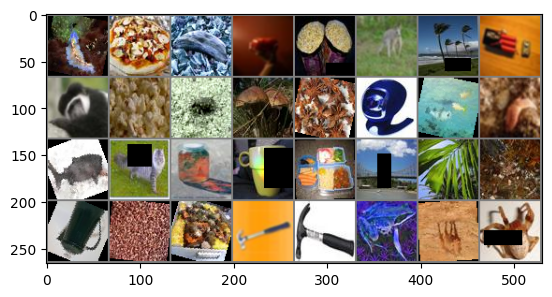

In [62]:
train_batch, train_labels = next(iter(train_loader))
val_batch, val_labels = next(iter(val_loader))

imshow(torchvision.utils.make_grid(train_batch))

In [63]:
loss_hist, train_eval_hist, val_eval_hist = train_model(net, train_loader, val_loader, criterion, optimizer, get_accuracy, device, 10)

 20%|██        | 2/10 [04:44<18:56, 142.05s/it]Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f6dd81876d0>
Traceback (most recent call last):
  File "/home/bruno/OneDrive/homework/studia/SEM4/SSNE/LAB/projekty/.venv/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1479, in __del__
    self._shutdown_workers()
  File "/home/bruno/OneDrive/homework/studia/SEM4/SSNE/LAB/projekty/.venv/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1462, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f6dd81876d0>
Traceback (most recent call last):
  File "/home/bruno/OneDrive/homework/studia/SEM4/SSNE/LAB/projekty/.venv/lib/python3.10/site-packages/torch/utils/data/datalo

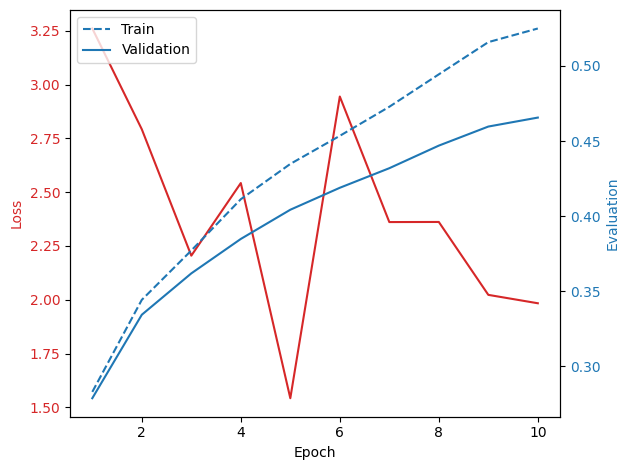

In [64]:
plot_training(iters, loss_hist, train_eval_hist, val_eval_hist)